In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Target function
f = lambda x: 1.0/3.0 * x + 5.0

In [7]:
x = np.linspace(-20, 60, 50)
fx = f(x)

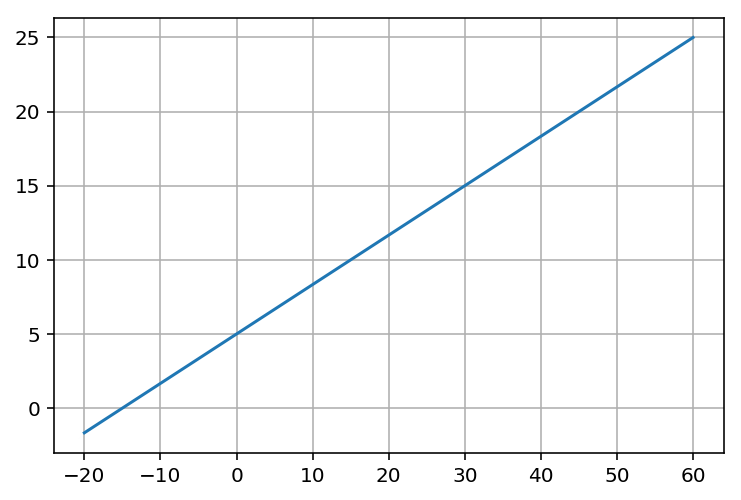

In [8]:
plt.plot(x,fx)
plt.grid()
plt.show()

In [9]:
np.random.rand(len(x))

array([ 0.2424679 ,  0.63744146,  0.28231051,  0.05120467,  0.06264374,
        0.32287523,  0.45196266,  0.22895049,  0.26740355,  0.6189556 ,
        0.27210206,  0.18280343,  0.84649266,  0.20537855,  0.43227575,
        0.32963118,  0.50972544,  0.38746366,  0.90391762,  0.63247372,
        0.91532992,  0.59793163,  0.98247365,  0.632913  ,  0.89290105,
        0.99969707,  0.62137595,  0.85318527,  0.04053428,  0.3371205 ,
        0.42259571,  0.53921434,  0.55019833,  0.51163368,  0.70029195,
        0.07325695,  0.86047533,  0.72020988,  0.49190746,  0.53779226,
        0.17829922,  0.05167184,  0.16766645,  0.07372231,  0.49377004,
        0.10054898,  0.97943307,  0.64087716,  0.24497728,  0.00607827])

In [10]:
# add random noise
np.random.seed(306)
y = fx + 10 * np.random.rand(len(x))

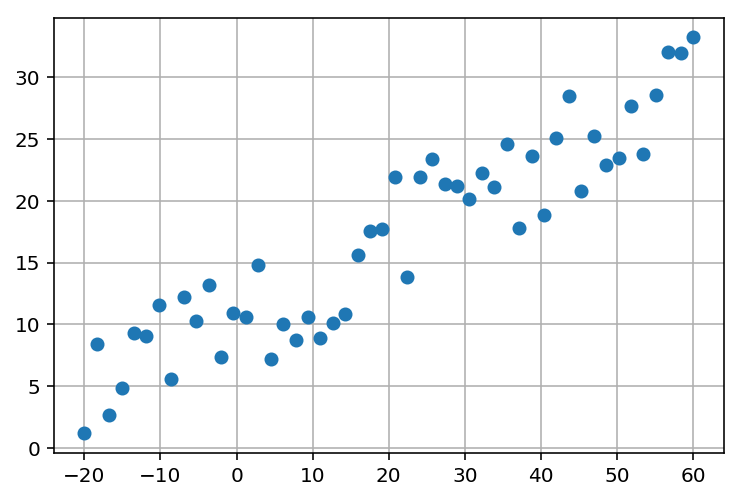

In [11]:
plt.plot(x,y, 'o')
plt.grid()
plt.show()

## 프로그램 실습 : 선형 회귀
주어진 데이터 $(x_i, y_i)$ for $i=1, 50$에 대하여 아래 loss function을 최소화하는 $a$와 $b$를 구하시오.
\begin{equation}
\min_{a,b} \sum_{i=1}^{50}|ax_i+b - y_i|^2
\end{equation}

1. `from numerical_optimizer import something`
1. Define loss function
1. Define grad function
1. (Optional) Define hess function
1. Tunning Parameter
    1. learning_rate
    1. MaxIter

### Version 1 : Steepest Descent

### TODO 1

위의 최적화문제를 풀기위해 Steepest Descent Method를 사용하려 합니다. 그러기 위해 필요한 `grad_a`를 구현하세요.

In [12]:
def loss(a, b):
    return np.sum( (a * x + b - y)**2 )

# TODO 1
def grad_a(a, b):
    return None

def grad_b(a, b):
    return np.sum( 2 * (a * x + b - y) )

In [13]:
a_0 = -0.5
b_0 = 2.0
from numerical_optimizers import steepest_descent_2d

### TODO 2

`steepest_descent_2d`의 앞부분의 3가지 Parameter를 채우세요.

1. 손실 함수(loss function)
1. a방향 편미분
1. b방향 편미분

In [14]:
# TODO 2
w0 = np.array([a_0, b_0])
wopt, _, _, _ = steepest_descent_2d(loss, grad_a, grad_b, w0, 
                                    verbose=False, learning_rate=1E-5, MaxIter=4000)
print(wopt)

[ 0.33555863  9.70209383]


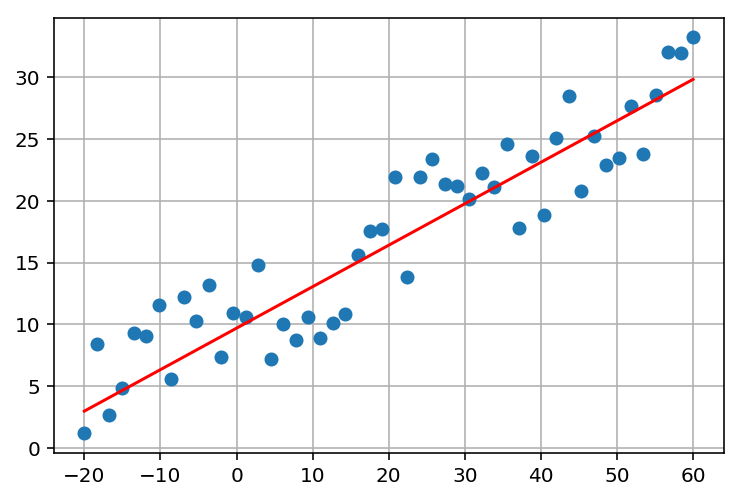

In [15]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

### Version 2 : Newton Method

### TODO 2

위의 최적화문제를 풀기위해 Newton Method를 사용하려 합니다. 그러기 위해 필요한 `hess_loss`를 구현하세요.

In [17]:
# TODO 2
def hess_loss(a, b):
    return None

In [18]:
from numerical_optimizers import newton_descent_2d
wopt, _, _, _ = newton_descent_2d(loss, grad_a, grad_b, hess_loss, w0, 
                                    verbose=False, learning_rate=1, MaxIter=1)
print(wopt)

[  0.31810453  10.53510921]


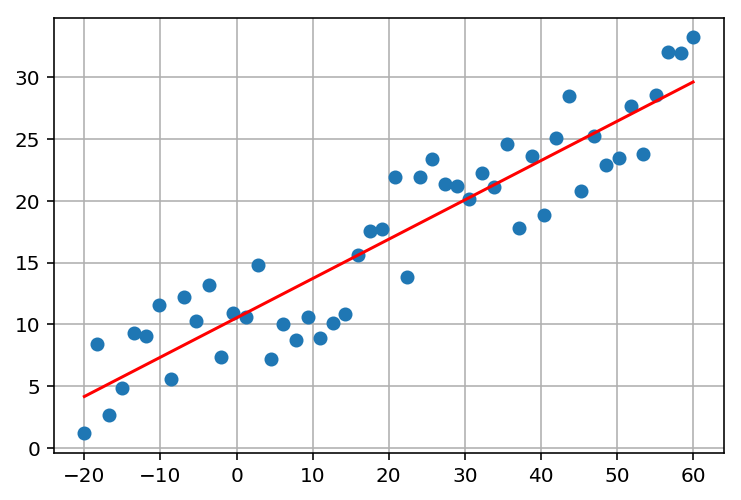

In [19]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

In [20]:
def loss(w):
    return np.sum( (w[0] * x + w[1] - y)**2 )

In [21]:
from scipy.optimize import minimize
res = minimize(loss, w0)
print(res)

      fun: 472.4377897592981
 hess_inv: array([[  1.80147105e-05,  -3.60294247e-04],
       [ -3.60294247e-04,   1.72058840e-02]])
      jac: array([ -3.81469727e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([  0.31810451,  10.53510951])


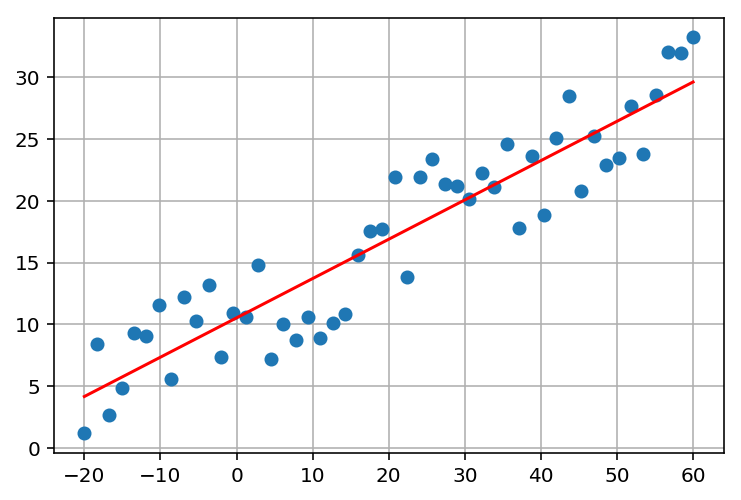

In [22]:
a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

     fun: 472.4377897592965
     jac: array([  7.62939453e-06,  -3.81469727e-06])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 10
    njev: 21
  status: 0
 success: True
       x: array([  0.31810451,  10.53510941])


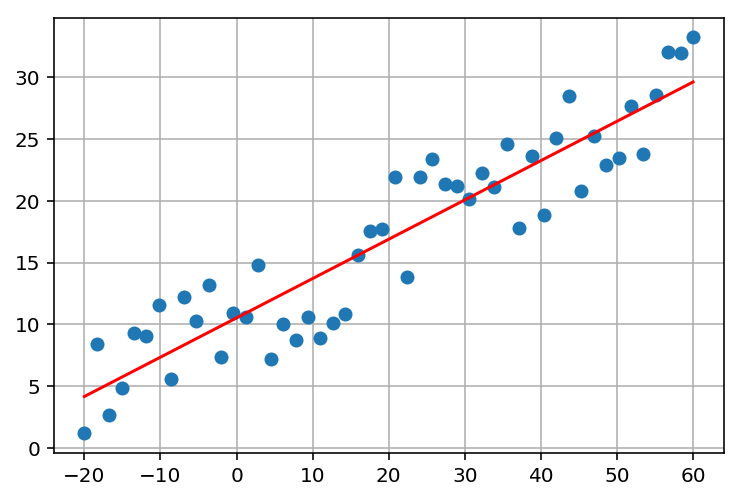

In [23]:
from scipy.optimize import minimize
res = minimize(loss, w0, method='CG')

print(res)

a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()